In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Co2_Emissions_by_Sectors.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,Construction,North America,Brazil,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,Mining,Europe,Germany,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,Manufacturing,South America,South Africa,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,Construction,Europe,India,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,Construction,Africa,China,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [3]:
df.dtypes

Industry_Type                            object
Region                                   object
Country                                  object
Year                                      int64
Co2_Emissions_MetricTons                float64
Energy_Consumption_TWh                  float64
Automobile_Co2_Emissions_MetricTons     float64
Industrial_Co2_Emissions_MetricTons     float64
Agriculture_Co2_Emissions_MetricTons    float64
Domestic_Co2_Emissions_MetricTons       float64
Population_Millions                     float64
GDP_Billion_USD                         float64
Urbanization_Percentage                 float64
Renewable_Energy_Percentage             float64
Industrial_Growth_Percentage            float64
Transport_Growth_Percentage             float64
dtype: object

In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

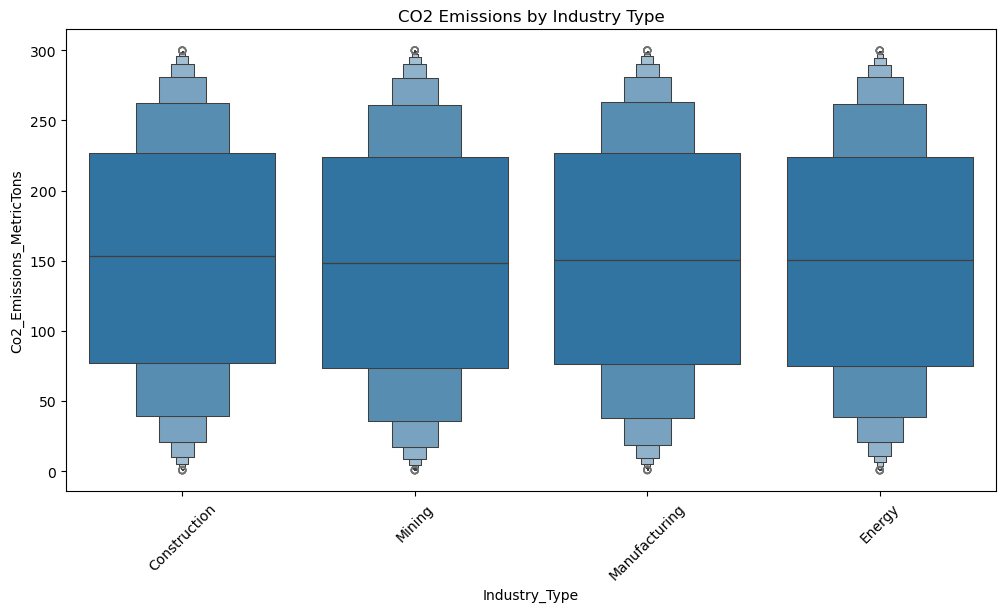

In [5]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Industry_Type', y='Co2_Emissions_MetricTons', data=df)
plt.title('CO2 Emissions by Industry Type')
plt.xticks(rotation=45)
plt.show()

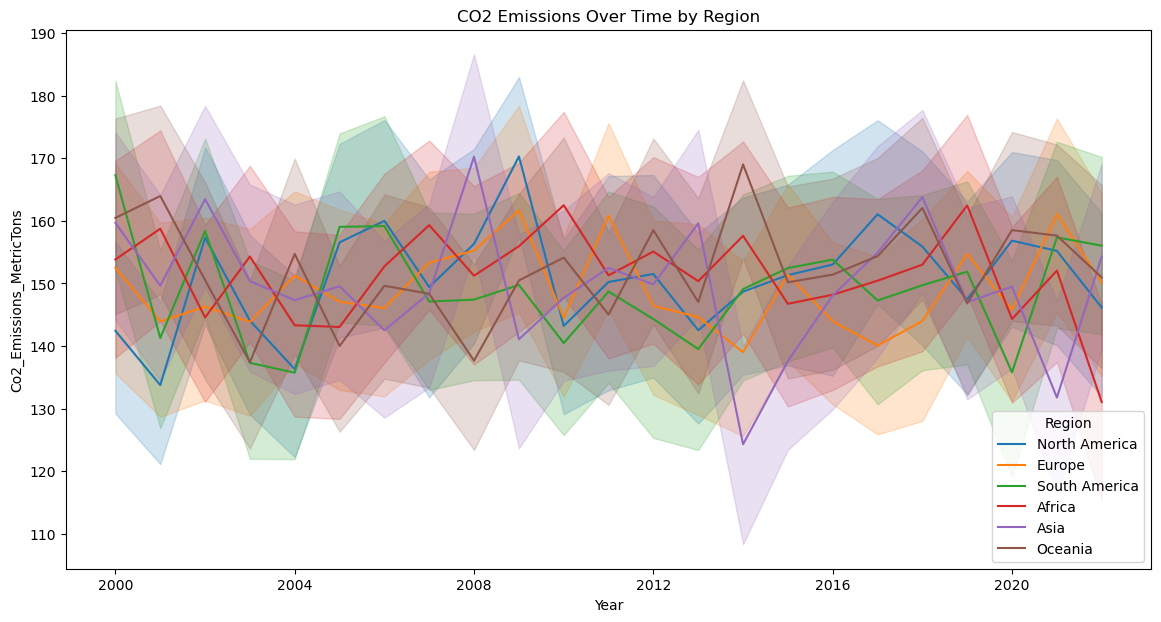

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Co2_Emissions_MetricTons', hue='Region', data=df)
plt.title('CO2 Emissions Over Time by Region')
plt.show()

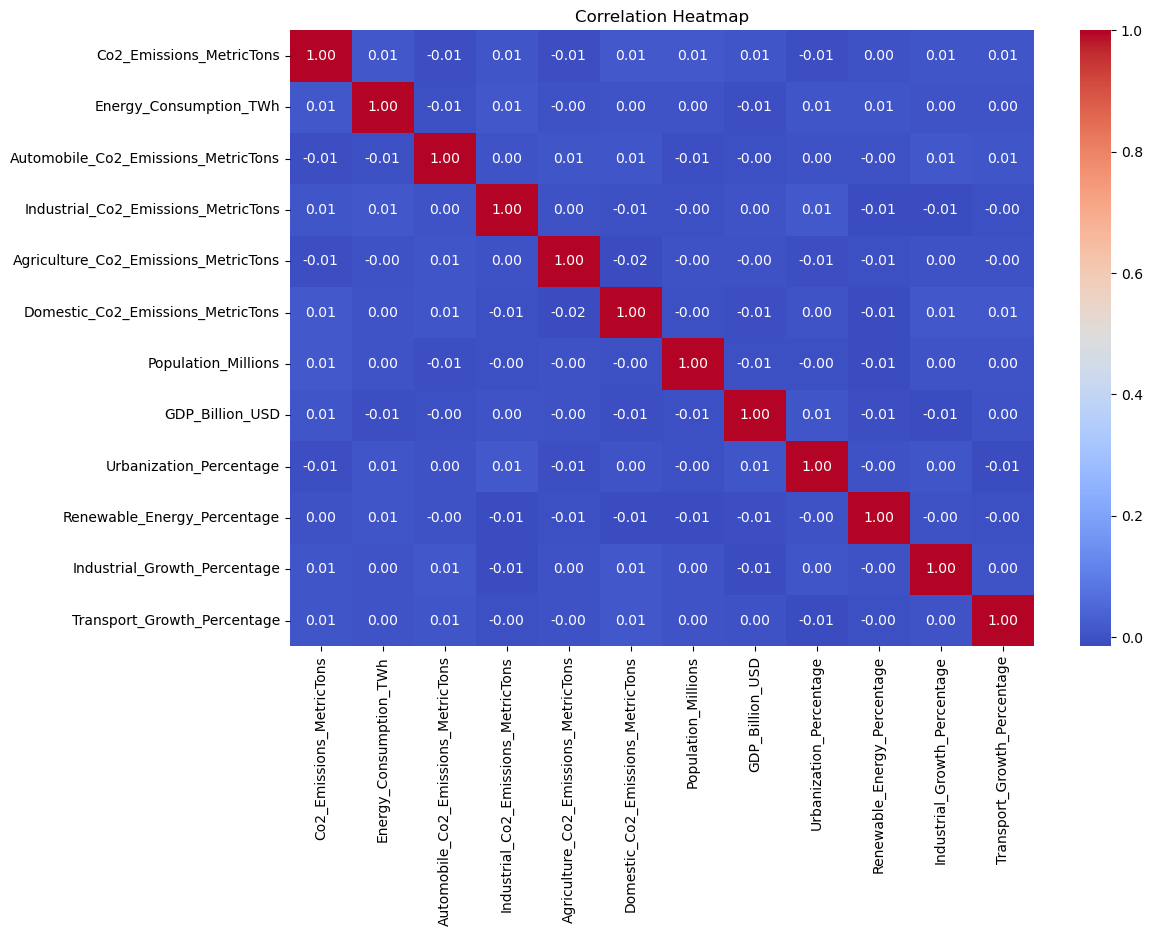

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = numeric_df.drop('Co2_Emissions_MetricTons', axis=1)
y = numeric_df['Co2_Emissions_MetricTons']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(7397.859153056102, -0.0028767181279698573)